<a href="https://colab.research.google.com/github/nafrielramadhan/data-preparation-and-dimensionality-reduction.ipynb/blob/main/data_preparation_and_dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Fakultas Ilmu Komputer, Universitas Indonesia

Questions answered by: Muhammad Nafriel Ramadhan
##**Topic: Data Preparation & Dimensionality Reduction**

</center>

## Import Library Data

Sumber Data: https://www.kaggle.com/datasets/avikasliwal/used-cars-price-prediction dengan pengubahan

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scp

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, Normalizer, StandardScaler, MinMaxScaler

In [ ]:
pip install category_encoders

In [ ]:
df = pd.read_csv('second_car_pricing.csv')

## Deskripsi Data

Data ini merupakan data harga mobil second yang dijual pada suatu website di India. Deskripsi kolom:
- `Name`: merk dan model mobil
- `Location`: lokasi tempat mobil dijual
- `Year`: tahun mobil diproduksi
- `Kilometers_Driven`: total jarak ditempuh dalam km
- `Fuel_Type`: tipe bahan bakar mobil (Petrol, Diesel, Electric, CNG, LPG)
- `Transmission`: tipe transmisi (Automatic/Manual)
- `Owner_Type`: jarak antar roda depan dan roda belakang mobil dalam inch
- `Mileage`: rasio jumlah jarak ditempuh dengan jumlah bahan bakar dikonsumsi dalam km/l atau km/kg
- `Engine`: volume mesin dalam CC
- `Power`: kekuatan mesin dalam Brake Horse Power (bhp)
- `Seats`: jumlah tempat duduk
- `New_Price`: referensi harga mobil pada kondisi baru


Target variable — `Price`: harga mobil dalam Lakh INR (1 Lakh = 100.000 INR)

In [ ]:
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,6218.000000,4.042000e+03,6175.000000,6218.000000
mean,2013.358154,5.976506e+04,5.277733,9.479341
std,3.262506,1.088091e+05,0.808191,11.146452
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.303975e+04,5.000000,10.000000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6218 entries, 0 to 6217
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6218 non-null   object 
 1   Location           6218 non-null   object 
 2   Year               6218 non-null   int64  
 3   Kilometers_Driven  4042 non-null   float64
 4   Fuel_Type          5472 non-null   object 
 5   Transmission       5783 non-null   object 
 6   Owner_Type         6218 non-null   object 
 7   Mileage            4352 non-null   object 
 8   Engine             6181 non-null   object 
 9   Power              6069 non-null   object 
 10  Seats              6175 non-null   float64
 11  New_Price          856 non-null    object 
 12  Price              6218 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 631.6+ KB


# Data Preparation

*Data Preparation* atau *data preprocessing* adalah suatu proses pembersihan dan transformasi pada *raw data* sebelum diproses dan dianalisis. Tujuan dari melakukan preparasi adalah dengan membersihkan data, hasil analisis dan prediksi dapat lebih akurat dan lebih bermakna.
<br> Data didapatkan dengan berbagai macam cara yang juga seringkali menghasilkan kekurangan pada data yang diproduksi, diantaranya duplikat, nilai yang salah, nilai yang hilang, dsb.
<br> Pada beberapa algoritma prediksi, dibutuhkan *preprocessing* khusus agar algoritma dapat berjalan dengan baik.

## Feature Extraction

Tahapan ini dilakukan untuk mengubah format awal data menjadi format yang kita butuhkan. Seringkali *raw data* diperoleh dalam format yang tidak sesuai dengan kebutuhan analisis kita. Melakukan tahap ini diperlukan pengetahuan terkait *domain* dan *karakteristik* atribut data yang hendak diubah agar format data yang dihasilkan sesuai

In [ ]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Mitsubishi Pajero 4X4 LHD,Bangalore,2012,155566.0,Diesel,Manual,Second,9.5 kmpl,2835 CC,118.6 bhp,6.0,NaN,9.15
1,Honda City i DTEC VX,Jaipur,2014,74000.0,Diesel,Manual,Second,25.1 kmpl,1498 CC,98.6 bhp,5.0,NaN,6.40
2,Hyundai Creta 1.6 SX Plus Diesel,Kochi,2018,NaN,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,13.34
3,Hyundai Elantra CRDi SX AT,Mumbai,2013,51000.0,Diesel,Automatic,First,19.5 kmpl,1582 CC,126.24 bhp,5.0,NaN,8.75
4,Honda City Corporate Edition,Mumbai,2012,51920.0,Petrol,Manual,First,NaN,1497 CC,116.3 bhp,5.0,NaN,4.25


Jika kita lihat, pada atribut `Mileage`, `Engine`, dan `Power` masih menggunakan satuan pada setiap baris data. Ini merupakan **redundansi** karena seharusnya satuan data cukup untuk diketahui pada bagian kolom saja. Untuk itu, kita dapat menghapus satuannya menggunakan kode berikut ini.

In [ ]:
df['Mileage'] = df['Mileage'].str.replace('kmpl','')
df['Mileage'] = df['Mileage'].str.replace('km/kg','')
df['Engine'] = df['Engine'].str.replace('CC','')
df['Power'] = df['Power'].str.replace('bhp','')

Dari atribut `Name` terlihat bahwa merk dan model mobil masih tergabung. Kita dapat membuat kolom baru `Brand` agar mempermudah proses analisis.

In [ ]:
df['Brand'] = df['Name'].str.split().str[0]

Terlihat bahwa merk selalu berada di kata paling awal, untuk itu kita bisa menggunakan *splitting* dan mengambil indeks 0 untuk atribut merk.

In [ ]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand
0,Mitsubishi Pajero 4X4 LHD,Bangalore,2012,155566.0,Diesel,Manual,Second,9.5,2835,118.6,6.0,NaN,9.15,Mitsubishi
1,Honda City i DTEC VX,Jaipur,2014,74000.0,Diesel,Manual,Second,25.1,1498,98.6,5.0,NaN,6.40,Honda
2,Hyundai Creta 1.6 SX Plus Diesel,Kochi,2018,NaN,Diesel,Manual,First,19.67,1582,126.2,5.0,NaN,13.34,Hyundai
3,Hyundai Elantra CRDi SX AT,Mumbai,2013,51000.0,Diesel,Automatic,First,19.5,1582,126.24,5.0,NaN,8.75,Hyundai
4,Honda City Corporate Edition,Mumbai,2012,51920.0,Petrol,Manual,First,NaN,1497,116.3,5.0,NaN,4.25,Honda


In [ ]:
df['Brand'].unique()

array(['Mitsubishi', 'Honda', 'Hyundai', 'Volkswagen', 'BMW', 'Ford',
       'Audi', 'Jeep', 'Renault', 'Mercedes-Benz', 'Maruti', 'Jaguar',
       'Skoda', 'Mahindra', 'Mini', 'Toyota', 'Nissan', 'Tata',
       'Chevrolet', 'Fiat', 'Volvo', 'Land', 'Porsche', 'Datsun', 'Isuzu',
       'Force', 'Smart', 'ISUZU', 'Lamborghini', 'Ambassador', 'Bentley'],
      dtype=object)

Nilai unik pada atribut `Brand`

Data yang sudah diubah formatnya ini masih perlu diubah ke dalam tipe data **numeric** karena sebelumnya masih bertipe **object** berupa string.

In [ ]:
df['Power'] = pd.to_numeric(df['Power'])
df['Engine'] = pd.to_numeric(df['Engine'])
df['Mileage'] = pd.to_numeric(df['Mileage'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6218 entries, 0 to 6217
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6218 non-null   object 
 1   Location           6218 non-null   object 
 2   Year               6218 non-null   int64  
 3   Kilometers_Driven  4042 non-null   float64
 4   Fuel_Type          5472 non-null   object 
 5   Transmission       5783 non-null   object 
 6   Owner_Type         6218 non-null   object 
 7   Mileage            4352 non-null   float64
 8   Engine             6181 non-null   float64
 9   Power              6069 non-null   float64
 10  Seats              6175 non-null   float64
 11  New_Price          856 non-null    object 
 12  Price              6218 non-null   float64
 13  Brand              6218 non-null   object 
dtypes: float64(6), int64(1), object(7)
memory usage: 680.2+ KB


Sekarang data sudah berhasil diubah ke dalam tipe data yang sesuai serta telah berhasil membuat kolom baru berupa `Brand`

Selanjutnya, kita akan men-drop atribut `Name` karena sudah tidak terlalu berguna dan hanya berfungsi sebagai identifier. Seperti yang kita tahu, identifier jika dibiarkan tidak terlalu berguna pada prediksi dan bahkan bisa menyebabkan **overfitting**. Alasan lain melakukan **drop column** lebih lengkapnya dapat dilihat pada *missing value handling* di bawah.

In [ ]:
df = df.drop('Name',axis=1)

**NOTE**: Membuat kolom/atribut baru secara umum perlu dilakukan dengan suatu tujuan atau alasan yang jelas serta harus sesuai dengan konteks awal pengumpulan data

## Duplicate Values Handling

Tahapan selanjutnya adalah melakukan pembersihan untuk data duplikat/redundan. Berikut merupakan kode untuk menampilkan jumlah **baris** yang duplikat, yaitu baris yang nilainya memilki nilai sama persis untuk semua kolomnya.

In [ ]:
df.duplicated().sum()

47

### SOAL 1a:
Berikan implementasi kode untuk menampilkan rows/baris mana saja yang merupakan duplikat. <br> **Hint:** gunakan sintaks indexing. Hasil akhir akan menampilkan dataframe beserta semua kolom

In [ ]:
# GUNAKAN variabel ini
df_dropped = df.copy()

In [ ]:
duplicate_rows = df_dropped[df_dropped.duplicated()]

duplicate_rows

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand
748,Delhi,2012,NaN,Petrol,Manual,First,13.50,1799.0,130.00,5.0,NaN,3.95,Honda
1056,Kochi,2019,14322.0,Petrol,Manual,First,21.10,814.0,55.20,5.0,NaN,4.23,Hyundai
1102,Chennai,2016,178000.0,Diesel,Manual,First,25.00,1396.0,69.00,5.0,NaN,2.50,Tata
1523,Hyderabad,2012,70337.0,Diesel,Manual,First,20.00,1399.0,68.00,5.0,NaN,2.80,Ford
1587,Mumbai,2012,51920.0,Petrol,Manual,First,NaN,1497.0,116.30,5.0,NaN,4.25,Honda
1601,Ahmedabad,2010,70002.0,Diesel,Manual,First,NaN,1493.0,110.00,5.0,NaN,3.45,Hyundai
1682,Delhi,2013,NaN,Diesel,Automatic,First,12.55,2982.0,168.50,7.0,NaN,16.50,Toyota
1696,Kolkata,2009,NaN,Diesel,Automatic,First,NaN,1968.0,147.51,5.0,NaN,9.95,Audi
1859,Kolkata,2014,53000.0,Diesel,Manual,First,17.80,1248.0,75.00,5.0,NaN,3.30,Maruti
2001,Chennai,2015,54000.0,Petrol,Manual,Third,18.90,1197.0,82.00,5.0,NaN,3.60,Hyundai


### SOAL 1b:
Berikan implementasi kode untuk melakukan penghapusan duplikat, simpan ke dalam variabel dataframe baru, dan tampilkan hasil bahwa duplikat telah di drop  <br> **Hint:** gunakan sintaks dari dokumentasi https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html.

In [ ]:
# Menghapus duplikat
df_dropped = df_dropped.drop_duplicates()

# Menampilkan hasil bahwa duplikat telah dihapus
print("Jumlah duplikat setelah dihapus:", df_dropped.duplicated().sum())

Jumlah duplikat setelah dihapus: 0


### SOAL 1c:
Jika ini adalah proyek analisis data pribadi Anda, apakah Anda akan melakukan drop duplicates? Jelaskan alasan Anda!

Iya akan saya lakukan drop duplicate untuk menyederhanakan dataset, membuatnya lebih mudah dipahami, dan menghindari bias yang mungkin muncul dalam analisis. Selain itu, jika duplikat tersebut mewakili kesalahan pengumpulan data atau tidak konsisten dengan sifat dataset, menghapusnya akan meningkatkan keandalan dan kebersihan data secara keseluruhan. Dengan demikian, untuk menjaga kualitas dan konsistensi data serta memfasilitasi analisis yang lebih akurat, saya akan memilih untuk menghapus duplikat dalam proyek analisis data pribadi saya.








## Missing Values Handling

Seringkali *raw data* yang diperoleh memiliki data yang *missing* atau hilang. Biasanya, nilai yang hilang akan berupa **entry yang kosong** atau berupa **object None** pada tabel. Kedua tipe ini dapat dideteksi secara mudah menggunakan method dari Pandas. <br> <br> Namun juga, terkadang data yang hilang telah disubsitutusi oleh nilai pengganti seperti 0 atau string "null" dan sebagainya tergantung sistem pengumpulan data yang dilakukan. Untuk itu, sekali lagi penting untuk mengetahui kondisi data.

### SOAL 2a:
Pada konteks dataset ini, *missing values* berupa nilai **kosong** atau NaN yang dapat dideteksi dengan mudah menggunakan method Pandas. Lengkapi implementasi kode berikut untuk menampilkan **jumlah** serta **persentase** *missing values* untuk setiap kolom secara **descending** (kolom dengan persentase null paling banyak berada di paling atas) setelah itu jalankan method ini pada dataframe! <br> **Note:** Pastikan Anda menggunakan DataFrame yang telah di drop nilai duplikatnya

In [ ]:
# Lengkapi implementasi kode mengecek null:
def cek_null(df):
    col_na = XX ##
    percent = XX ##

    missing_data = pd.concat([XX, XX], axis=1, keys=['Total Missing', 'Missing Percentage'])
    print(missing_data)

In [ ]:
import pandas as pd

# Lengkapi implementasi kode mengecek null:
def cek_null(df):
    # Hitung total nilai kosong (NaN) untuk setiap kolom
    col_na = df.isnull().sum()

    # Hitung persentase nilai kosong untuk setiap kolom
    percent = (df.isnull().sum() / len(df)) * 100

    # Gabungkan hasil perhitungan menjadi satu DataFrame
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total Missing', 'Missing Percentage'])

    # Urutkan DataFrame berdasarkan persentase nilai kosong secara descending
    missing_data = missing_data.sort_values(by='Missing Percentage', ascending=False)

    # Tampilkan DataFrame hasil
    print(missing_data)

# Gunakan pada DataFrame yang telah di-drop nilai duplikatnya (df_no_duplicates)
cek_null(df_dropped)


                   Total Missing  Missing Percentage
New_Price                   5320           86.209690
Kilometers_Driven           2163           35.051045
Mileage                     1858           30.108572
Fuel_Type                    744           12.056393
Transmission                 435            7.049101
Power                        148            2.398315
Seats                         43            0.696808
Engine                        37            0.599579
Location                       0            0.000000
Year                           0            0.000000
Owner_Type                     0            0.000000
Price                          0            0.000000
Brand                          0            0.000000


Data yang hilang tidak selalu terjadi karena hal yang sama. Terdapat tiga kategori utama untuk kondisi dari *missing values* yang dapat terjadi:

- `Missing Completely At Random (MCAR):` Kondisi dimana kemungkinan data yang hilang **tidak tergantung** variabel maupun nilai observasi, sama sekali diluar pengaruh teknik pengambilan data atau sumber data. Salah satu contohnya adalah terjadi kerusakan/error secara sistematis yang menyebabkan data hilang secara acak atau penulis data lupa mengisi salah satu atribut secara acak.
- `Missing At Random (MAR):` Kondisi dimana kemungkinan hilang **memiliki ketergantungan** dari suatu variabel ataupun nilai observasi secara acak. Salah satu contohnya adalah sistem tidak men-*track* suatu variabel secara akurat dan dapat terjadi kekosongan secara acak. Ini merupakan jenis *missing value* yang realistis pada sebagian besar kasus.
- `Missing Not At Random (MNAR):` Kondisi dimana kemungkinan hilang terjadi untuk alasan yang **tidak diketahui**. Kemungkinan *missing value* untuk variabel yang sama saling berbeda sesuai akibat kondisi yang tidak mudah dijelaskan. Ini merupakan situasi yang paling kompleks dari yang lain.

Berikut merupakan salah satu artikel yang sangat bagus untuk memahami metode penanganan *missing values* secara lengkapnya: https://www.datacamp.com/tutorial/techniques-to-handle-missing-data-values

### Teknik menghandle *missing value*
Berikut merupakan cara-cara terpopuler untuk menghandle *missing value*:
- **Drop column:** Melakukan penghapusan variabel/kolom sehingga variabel tidak lagi digunakan untuk tahapan selanjutnya. Secara umum digunakan bila kolom memiliki proporsi baris *missing value* yang **terlalu banyak** atau tidak memiliki peran penting untuk kepentingan analisis ataupun modelling. Nalar dan pengetahuan umum dapat diterapkan jika kita hendak menghapus suatu kolom jika kita pikir bahwa kolom tersebut tidak terlalu berpengaruh pada tujuan dataset
- **Drop rows:** Melakukan penghapusan pada observasi/baris yang memiliki *missing value*. Secara umum dapat digunakan ketika jumlah obervasi *missing value* pada suatu variabel **relatif kecil** dan tidak terlalu berpengaruh ke kondisi dataset secara keseluruhan.
- **Imputation:** Melakukan pengisian pada *missing values.* Perlu diingat bahwa penerapan metode *imputation* harus memperhatikan asumsi dari kondisi hilangnya data (MCAR, MAR, MNAR) serta kondisi dari suatu variabel. Selebihnya pada bagian berikutnya.
- Membiarkan data yang hilang. Hal ini dapat dilakukan jika kita berasumsi data dapat berguna untuk tahapan analisis selanjutnya meskipun dalam keadaan *missing* (null/NaN/None, etc)

Catatan tambahan terkait **drop column:** <br>
Kolom/atribut dapat dianggap tidak penting berdasarkan pertimbangan, nalar, atau basic knowledge manusia. Sebagai contoh, apabila kita ingin mengukur survival rate penumpang Titanic, atribut nama pada dataset ini tidak mengindikasikan apakah dia survive apa tidak. Selain itu, ada beberapa atribut juga yang mungkin tidak akan mempengaruhi pengukuran tersebut. Sehingga atribut-atribut tersebut dapat didrop.


Kolom/atribut perlu didrop apabila:

*   Kolom tidak intuitif.
*   Kolom mempunyai banyak missing values.
*   Kolom tidak informatif.
*   Kolom dapat membahayakan untuk model tertentu.
*   Kolom tersebut dapat dihasilkan dari atribut yang lain.

Penggunaan dropping column/rows memiliki **kelebihan** berupa:
- 1. Implementasi yang mudah
- 2. Tidak mengganggu dataset bila kolom atau baris yang dihapus tidak relevan terhadap analisis

Penggunaan dropping column/rows memiliki **kekurangan** berupa:
- 1. Potensi terjadinya hilangnya informasi
- 2. Bisa dihindari bila situasi data hilang karena acak (MCAR, MAR)
- 3. Mengecilkan jumlah dataset apabila menghapus rows pada suatu kolom yang memiliki banyak *missing value* (secara umum jika menghapus lebih dari 50% baris)  

### Strategi Imputation
- Pada situasi `Missing Completely at Random (MCAR)`, dapat menggunakan **mean, median, atau mode** imputation. Pada Lab kali ini, scope akan dibatasi pada metode imputasi ini saja. Yaitu mengisi data menggunakan atribut statistik dari suatu variabel tersebut. Selain itu, bisa juga menggunakan **random sampling** imputation yaitu menggunakan sampling dari distribusi variabel untuk mengisi suatu nilai secara acak.
- Pada situasi `Missing at Random (MAR)`, dapat digunakan metode **multiple imputation** yaitu metode untuk melakukan pengisian nilai hilang yang mengambil pertimbangan nilai-nilai pada kolom lainnya. Implementasinya di Python dapat menggunakan library `miceforest`
- Pada situasi `Missing not at Random (MNAR)`, dapat digunakan metode **Pattern Substitution atau Maximum Likelihood estimation** yaitu metode imputasi data secara menganalisis pola data.

### Implementasi mean, median, mode imputation
Dalam menerapkan imputasi tipe ini, penting untuk mengetahui **distribusi** dan **tipe data** dari variabel yang hendak dilakukan imputasi.
- Untuk tipe data numerik kontinu distribusi normal, dapat menggunakan **mean**
- Untuk tipe data numerik kontinu distribusi yang skewed, dapat menggunakan **median**
- Untuk tipe data kategorikal (string, binary, ordinal) dapat menggunakan **mode**
- Untuk tipe data numerik diskret, dapat menggunakan **mode**

Contoh implementasi:

In [ ]:
def fill_null_mean(df):
    mean = df.mean()
    filled_df = df.fillna(mean)
    return filled_df
def fill_null_median(df):
    median = df.median()
    filled_df = df.fillna(median)
    return filled_df
def fill_null_mode(df):
    mode = df.mode()[0]
    filled_df = df.fillna(mode)
    return filled_df

Jalankan kode berikut pada DataFrame tanpa duplikat Anda untuk menampilkan distribusi dari data untuk membantu pada soal selanjutnya

In [ ]:
def show_data_type_and_distribution(df):
    print("Menampilkan informasi dataset dan tipe data")
    print('#'*50)
    df.info()
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    print('#'*50)
    print("Menampilkan distribusi data numerik")
    for col in df.select_dtypes(include=numerics):
        plt.figure(figsize=(3,3))
        sns.histplot(df[col])
        plt.show()
    print('#'*50)
    print("Menampilkan distribusi data kategorikal")
    categoricals = ["Fuel_Type", "Transmission", "Owner_Type","Location"]
    for col in categoricals:
        plt.figure(figsize=(4,3))
        sns.countplot(y=df[col])
        plt.show()

Menampilkan informasi dataset dan tipe data
##################################################
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6171 entries, 0 to 6217
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6171 non-null   object 
 1   Year               6171 non-null   int64  
 2   Kilometers_Driven  4008 non-null   float64
 3   Fuel_Type          5427 non-null   object 
 4   Transmission       5736 non-null   object 
 5   Owner_Type         6171 non-null   object 
 6   Mileage            4313 non-null   float64
 7   Engine             6134 non-null   float64
 8   Power              6023 non-null   float64
 9   Seats              6128 non-null   float64
 10  New_Price          851 non-null    object 
 11  Price              6171 non-null   float64
 12  Brand              6171 non-null   object 
dtypes: float64(6), int64(1), object(6)
memory usage: 675.0+ KB
##############

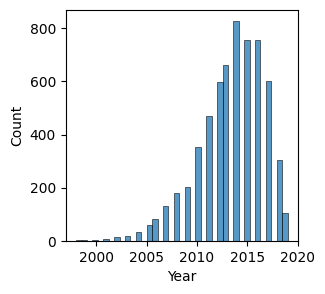

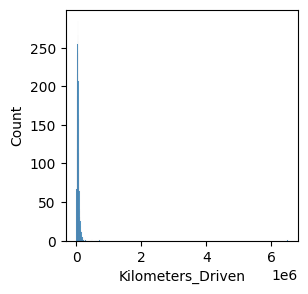

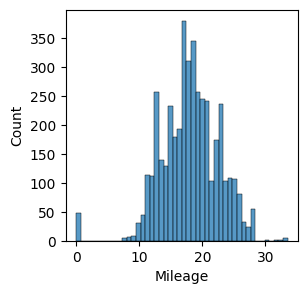

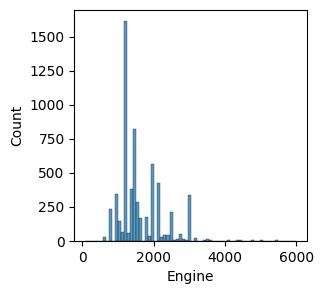

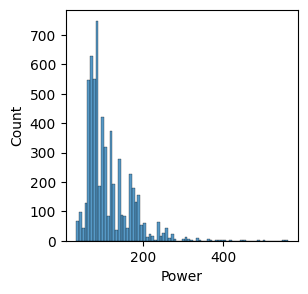

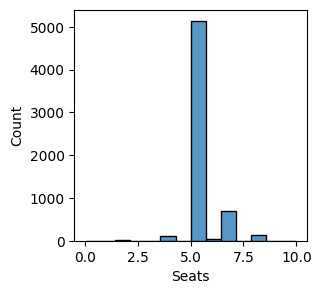

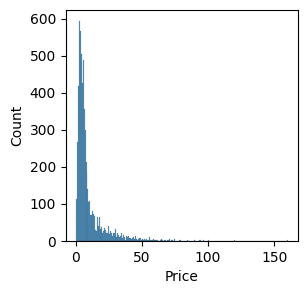

##################################################
Menampilkan distribusi data kategorikal


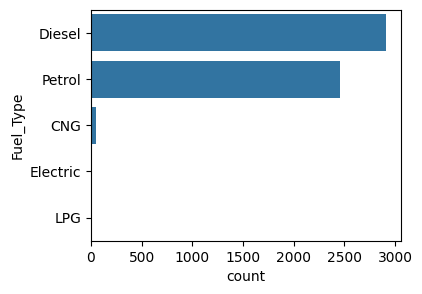

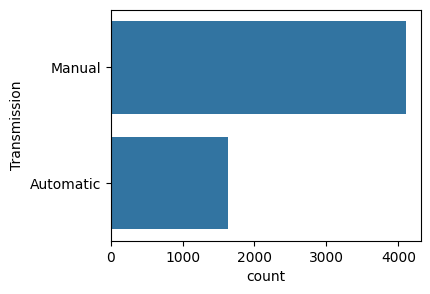

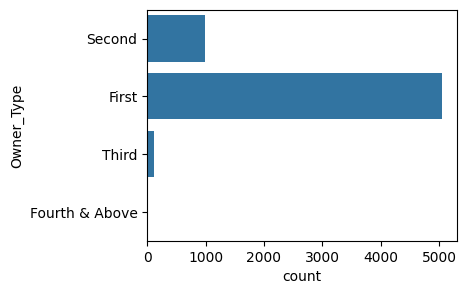

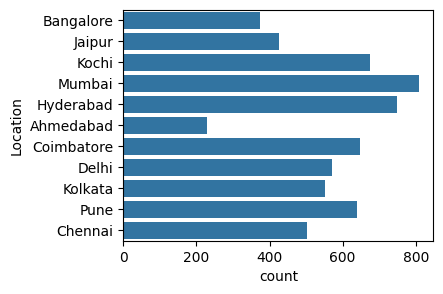

In [ ]:
show_data_type_and_distribution(df_dropped)


### SOAL 2b:
Perhatikan jumlah & persentase null pada kolom `New_Price`. Implementasi kode untuk melakukan drop pada kolom tersebut! Lalu, berikan alasan singkat untuk menjustifikasi penghapusan pada kolom tersebut!

In [ ]:
# Melakukan drop pada kolom "New_Price"
df_dropped = df_dropped.drop(columns=["New_Price"])

Saya menghapus kolom "New_Price" didasarkan pada persentase nilai kosong yang tinggi, sekitar 86,21%. Jumlah data yang hilang yang signifikan seperti ini dapat memengaruhi analisis dan mungkin tidak memberikan wawasan yang bermakna. Selain itu, pengisian nilai kosong sebanyak itu mungkin tidak dapat dilakukan dengan akurat atau layak tanpa metode yang dapat diandalkan atau data eksternal. Menghapus kolom ini menyederhanakan dataset dan memfokuskan analisis pada aspek data yang lebih lengkap.

### Soal 2c
Asumsikan bahwa data yang hilang merupakan kondisi `Missing Completely at Random (MCAR)`. Imputasikan variabel lain yang memiliki nilai null sesuai dengan **tipe data (kontinu/diskrit/kategorikal)** dan **distribusi** nya serta berikan alasan singkat! Jangan lupa tampilkan hasil setelah nilai null sudah tidak ada!
<br>**Hint**: terdapat 7 kolom/atribut lain setelah `New_Price` di drop, gunakan method imputasi diatas pada setiap kolom, distribusi dapat dilihat pada visualisasi di atas

In [ ]:
for col in ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']:
    df_dropped[col] = df_dropped[col].fillna(df_dropped[col].median())

for col in ['Fuel_Type', 'Transmission']:
    df_dropped[col] = df_dropped[col].fillna(df_dropped[col].mode()[0])

cek_null(df_dropped)

df_imputed = df_dropped.copy()

                   Total Missing  Missing Percentage
Location                       0                 0.0
Year                           0                 0.0
Kilometers_Driven              0                 0.0
Fuel_Type                      0                 0.0
Transmission                   0                 0.0
Owner_Type                     0                 0.0
Mileage                        0                 0.0
Engine                         0                 0.0
Power                          0                 0.0
Seats                          0                 0.0
Price                          0                 0.0
Brand                          0                 0.0


1. Kolom Kilometers_Driven diimputasi dengan median karena distribusinya cenderung tidak normal dan numerik.

2. Kolom Mileage diimputasi dengan median karena distribusinya cenderung terdistribusi secara tidak normal dan numerik.

3. Kolom Engine diimputasi dengan median karena distribusinya cenderung terdistribusi secara tidak normal dan numerik.

4. Kolom Power diimputasi dengan median karena distribusinya cenderung terdistribusi secara tidak normal dan numerik.

5. Kolom Seats diimputasi dengan median karena distribusinya cenderung terdistribusi secara tidak normal dan numerik.

6. Kolom Fuel_Type diimputasi dengan mode karena distribusinya cenderung terdistribusi secara kategorikal.

7. Kolom Transmission diimputasi dengan mode karena distribusinya cenderung terdistribusi secara kategorikal.

## Outlier Handling
**Note:** Pastikan Anda mengerjakan bagian ini dan selanjutnya setelah mengisi *missing values* pada dataset!

Outliers merupakan nilai observasi yang sangat jauh, titik ekstrim, atau tidak wajar dari distribusi suatu variabel. Nilai yang dimaksud ini bisa merupakan nilai yang **terlalu besar** atau **terlalu kecil** dibandingkan nilai-nilai lainnya. Kehadiran outliers dapat terjadi karena beberapa hal:
1. Kesalahan human error pada penginputan
2. Kesalahan sampling atau mengambil sampel yang terlalu ekstrim
3. Kesalahan pemprosesan data
4. Alami/Natural atau memang terdapat outliers pada kenyataan observasi suatu variabel

Dalam mendeterksi dan menganalisis suatu outlier, lagi-lagi penting bagi kita untuk memperhatikan **distribusi** dan konteks suatu atribut serta tujuan secara umum dari penggunaan dataset.

Berikut merupakan semacam **guideline** singkat untuk melakukan analisis outlier:
1. Jika kita menggunakan dataset untuk kepentingan prediksi menggunakan model yang **sensitif terhadap outlier** (contohnya Regresi Linear, selengkapnya akan dibahas pada Lab-lab selanjutnya), kita dapat melakukan **drop outlier**. Membiarkan outlier dapat menyebabkan terjadinya **overfitting** pada model prediksi tertentu ataupun menyebabkan berkurangnya akurasi pada model-model tertentu sehingga perlu di drop. Terlebih lagi, apabila persentase outlier cenderung kecil dan tidak membantu jika dibiarkan.
2. Jika asumsi kita adalah outlier pada data merupakan **noise** atau muncul akibat **error/kesalahan observasi**, sebaiknya dilakukan **drop outlier** untuk membersihkan data.
3. Jika kita perlu melakukan prediksi untuk hal-hal yang mengandalkan *outliers*
4. Jika asumsi kita adalah outlier yang muncul pada data merupakan hal yang alami/wajar sebagaimana kenyataan pada suatu variabel, kita dapat membiarkannya pada data.

Mendeteksi outliers memiliki banyak cara tergantung dari sifat setiap distribusi variabel maupun dataset secara keseluruhan. Berikut merupakan cara yang populer dan banyak digunakan:
1. Z-Score atau Standar Deviasi: Metode ini dapat digunakan untuk mendeteksi outlier pada data yang berdistribusi **normal**. Definisi outlier pada Z-Score adalah nilai-nilai yang jatuh pada **nilai standar deviasi > 3 atau < -3**
2. Boxplot: Metode ini dapat digunakan untuk menampilkan outliers secara visual sehingga lebih intuitif untuk melihat kemunculannya dan melakukan analisis.
3. Interquartile range (IQR): Metode ini mendeketsi outlier yang melebihi batas atas $Q3+ 1.5 *IQR$ atau kurang dari batas bawah $Q1 - 1.5*IQR$ dimana $IQR = Q3-Q1$. Metode ini secara umum dapat digunakan untuk distribusi yang tidak normal

Jalankan kode untuk menampilkan Boxplot untuk DataFrame `df_imputed` untuk membantu menjawab soal berikutnya

In [ ]:
def show_boxplot(df):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    for col in df.select_dtypes(include=numerics):
        plt.figure(figsize=(3,3))
        sns.boxplot(x=df[col])
        plt.show()

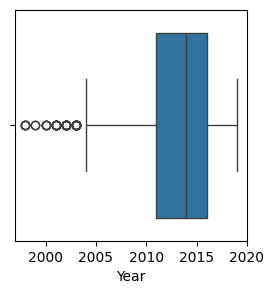

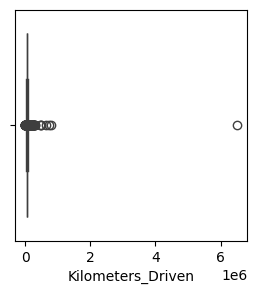

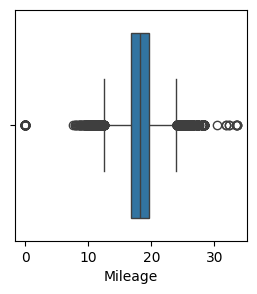

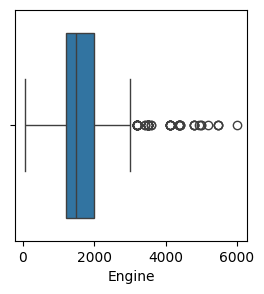

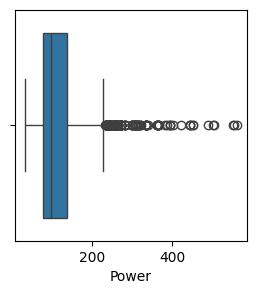

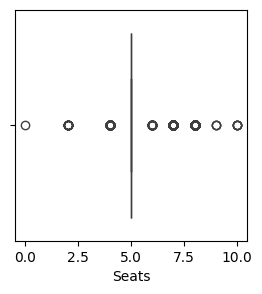

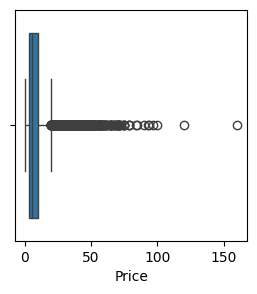

In [ ]:
# UNCOMMENT & JALANKAN KODE
show_boxplot(df_imputed)

## Soal 3
Kita dapat melihat bahwa pada setiap variabel memiliki outlier. Asumsikan bahwa kebutuhan kita adalah melakukan prediksi menggunakan model yang sensitif terhadap *outlier* dan *outlier* yang muncul merupakan suatu error dari penginputan atau observasi.

**3a)** Tampilkan outlier dari variabel yang terlihat memiliki distribusi normal berdasarkan Boxplot! <br>
**3b)** Implementasikan cara untuk mendrop outlier dari variabel tersebut <br>
**3c)** Jika ini adalah proyek analisis data pribadi Anda, apakah Anda akan melakukan drop outlier pada atribut yang dimaksud pada nomor 3b? Jelaskan alasan Anda! <br>
**Hints:**
1. Terdapat 1 variabel yang terlihat cenderung ke distribusi normal
2. Dapat menggunakan IQR atau Z-Score
3. Tipe data numerik kontinu

**Side note:** Di dunia nyata tentu saja kita tidak bisa semudah itu melakukan asumsi untuk mendrop outlier, tetapi kita membuat asumsi ini untuk kepentingan latihan dan belajar

In [ ]:
## Gunakan variabel ini
df_remove_outlier = df_imputed.copy()

In [ ]:
# Calculate IQR for 'Mileage'
Q1_mileage = df_remove_outlier['Mileage'].quantile(0.25)
Q3_mileage = df_remove_outlier['Mileage'].quantile(0.75)
IQR_mileage = Q3_mileage - Q1_mileage

# Define bounds for outliers in 'Mileage'
lower_bound_mileage = Q1_mileage - 1.5 * IQR_mileage
upper_bound_mileage = Q3_mileage + 1.5 * IQR_mileage

# Identify outliers in 'Mileage'
outliers_mileage = df_remove_outlier[(df_remove_outlier['Mileage'] < lower_bound_mileage) | (df_remove_outlier['Mileage'] > upper_bound_mileage)]

outliers_mileage[['Mileage']]

,Mileage
0,9.50
1,25.10
10,26.00
13,12.07
31,25.47
...,...
6180,25.17
6187,12.40
6190,28.09
6202,10.37


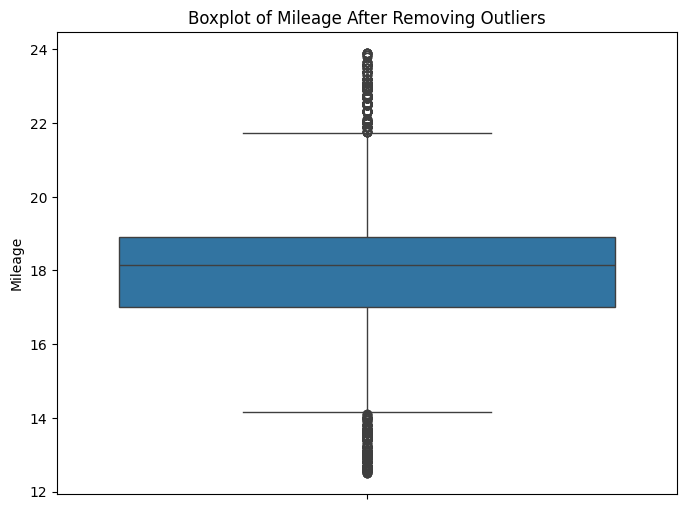

In [ ]:
# Drop outliers from 'Mileage'
df_no_mileage_outliers = df_remove_outlier[~((df_remove_outlier['Mileage'] < lower_bound_mileage) | (df_remove_outlier['Mileage'] > upper_bound_mileage))]

# Creating boxplot for 'Mileage' after dropping outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_no_mileage_outliers['Mileage'])
plt.title('Boxplot of Mileage After Removing Outliers')
plt.show()

Dalam proyek analisis data ini, saya memilih untuk mempertahankan outlier pada variabel Mileage. Keputusan ini didasarkan pada pertimbangan bahwa outlier-outlier tersebut mungkin merupakan bagian yang valid dari distribusi data dan mungkin memiliki informasi yang signifikan yang dapat memberikan wawasan tambahan dalam analisis. Selain itu, dengan mempertahankan outlier, saya dapat menghindari kehilangan informasi yang mungkin berharga dari data. Meskipun outlier bisa mempengaruhi beberapa metode analisis, namun dalam konteks ini, mempertahankan outlier dianggap dapat memberikan gambaran yang lebih lengkap dan akurat tentang variabilitas data yang ada. Dengan demikian, mempertahankan outlier dianggap sebagai langkah yang mendukung untuk mencapai pemahaman yang lebih komprehensif tentang karakteristik data dan hasil analisis yang lebih informatif.

## Encoding
**Note:** Jalankan ulang kode pada bagian ini setelah mengisi *missing values*!

Selanjutnya adalah tahapan melakukan encoding, yaitu mengubah tipe data kategorikal menjadi bentuk numerik. Diantara tipe-tipe encoding yang populer digunakan adalah:
1. **One-hot encoding**: mengubah menjadi bentuk binary sesuai dengan jumlah nilai *unique* yang terdapat pada kolom.
2. **Label encoding**: mengubah ke bentuk integer secara *unique*

In [ ]:
df_encode = df_imputed.copy()

In [ ]:
df_encode.select_dtypes(include=object).columns

Index(['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand'], dtype='object')

In [ ]:
print("Menampilkan nilai unique yang terdapat pada setiap kolom kategorikal")
print('#'*70)
print()
for col in df_encode.select_dtypes(include=object).columns:
    print(col, f": {len(df_encode[col].unique())}", df_encode[col].unique())
    print("\n")

Menampilkan nilai unique yang terdapat pada setiap kolom kategorikal
######################################################################

Location : 11 ['Bangalore' 'Jaipur' 'Kochi' 'Mumbai' 'Hyderabad' 'Ahmedabad'
 'Coimbatore' 'Delhi' 'Kolkata' 'Pune' 'Chennai']


Fuel_Type : 5 ['Diesel' 'Petrol' 'CNG' 'Electric' 'LPG']


Transmission : 2 ['Manual' 'Automatic']


Owner_Type : 4 ['Second' 'First' 'Third' 'Fourth & Above']


Brand : 31 ['Mitsubishi' 'Honda' 'Hyundai' 'Volkswagen' 'BMW' 'Ford' 'Audi' 'Jeep'
 'Renault' 'Mercedes-Benz' 'Maruti' 'Jaguar' 'Skoda' 'Mahindra' 'Mini'
 'Toyota' 'Nissan' 'Tata' 'Chevrolet' 'Fiat' 'Volvo' 'Land' 'Porsche'
 'Datsun' 'Isuzu' 'Force' 'Smart' 'ISUZU' 'Lamborghini' 'Ambassador'
 'Bentley']




### Label Encoding

Menggunakan **LabelEncoder** pada kolom `Location` & `Brand`

In [ ]:
label_encoder = LabelEncoder()

df_encode['Location_enc'] = label_encoder.fit_transform(df_encode['Location'])
df_encode['Brand_enc'] = label_encoder.fit_transform(df_encode['Brand'])

`Location` telah berhasil di encode menjadi variabel `Location_enc` dan `Brand` telah berhasil di encode menjadi variabel `Brand_enc`

Selain menggunakan **LabelEncoder**,  tipe encoding ini bisa juga dilakukan secara manual menggunakan fungsi `map()`

In [ ]:
df_encode['Owner_Order'] = df_encode['Owner_Type'].map({'Second':2, 'First':1, 'Third':3, 'Fourth & Above':4})

In [ ]:
df_encode['Owner_Order'].unique()

array([2, 1, 3, 4])

`Owner_Type` telah berhasil di encode menjadi variabel `Owner_Order`

## One-Hot Encoding

Menggunakan **get_dummsies** pada kolom `Fuel_Type` dan `Transmission`

In [ ]:
df_encode = pd.get_dummies(df_encode, columns = ['Fuel_Type', 'Transmission'], drop_first=True)

Selanjutnya kita akan mendrop kolom yang tidak digunakan

In [ ]:
df_encode = df_encode.drop(df_encode.select_dtypes(include=object),axis=1)

In [ ]:
df_encode.info()

Semua kolom sudah berhasil diubah menjadi bentuk numerik, namun masih ada satu tahapan lagi sebelum data dapat digunakan untuk keperluan machine learning.

### Soal 4a
Jelaskan perbedaan antara LabelEncoding dengan OneHotEncoding dari sisi tipe data yang cocok digunakan! Dari dataset, klasifikasikan setiap data kategorikal ke dalam tipe datanya **serta** lebih cocok encoding tipe apa!  

Perbedaan utama antara Label Encoding dan One-Hot Encoding terletak pada representasi angka yang dihasilkan dan bagaimana representasi tersebut memengaruhi model machine learning yang digunakan. Kedua teknik ini digunakan untuk mengubah data kategorikal menjadi format yang bisa dipahami oleh algoritma machine learning, tetapi mereka melakukannya dengan cara yang berbeda.

Label Encoding
1. Representasi: Mengubah setiap kategori menjadi angka secara berurutan mulai dari 0 hingga N-1, di mana N adalah jumlah kategori. Misalnya, jika ada tiga kategori ('Merah', 'Biru', 'Hijau'), mereka mungkin di-encode sebagai 0, 1, 2.
2. Tipe Data yang Cocok: Cocok untuk variabel kategorikal ordinal, di mana urutan kategorinya penting, seperti 'rendah', 'sedang', 'tinggi'.
3. Kekurangan: Model mungkin salah menginterpretasikan nilai numerik sebagai memiliki urutan atau pentingnya (misalnya, 'tinggi' > 'sedang' > 'rendah'), yang tidak selalu diinginkan untuk variabel kategorikal nominal.

One-Hot Encoding
1. Representasi: Membuat kolom baru untuk setiap kategori, di mana hanya satu kolom yang aktif (nilai 1) untuk setiap observasi dan sisanya 0. Misalnya, 'Merah' mungkin diwakili sebagai [1, 0, 0], 'Biru' sebagai [0, 1, 0], dan 'Hijau' sebagai [0, 0, 1].
2. Tipe Data yang Cocok: Cocok untuk variabel kategorikal nominal, di mana tidak ada urutan alami di antara kategori.
3. Kekurangan: Menambah banyak kolom ke dataset, yang bisa menyebabkan dimensi data yang sangat besar dengan banyak kategori (disebut sebagai "curse of dimensionality").


### Soal 4b
Pada atribut `Location` & `Brand`, mengapa keduanya secara umum tidak cocok menggunakan LabelEncoding? Berikan alasan mengapa pada kasus tertentu tipe data tersebut bisa saja dilakukan LabelEncoding! <br>
**Hint:** Dimensi

Atribut "Location" dan "Brand" pada umumnya tidak cocok menggunakan LabelEncoding karena kedua atribut tersebut merupakan tipe data kategorikal nominal, yang berarti kategori-kategori dalam atribut tersebut tidak memiliki urutan atau hierarki yang inheren. Penggunaan LabelEncoding pada tipe data ini dapat menimbulkan masalah karena algoritma machine learning mungkin menginterpretasikan nilai-nilai numerik hasil encoding sebagai memiliki urutan atau pentingnya, yang tidak sesuai dengan sifat asli data.

Alasan Mengapa Tidak Cocok:
1. Interpretasi Model: Model bisa salah mengasumsikan adanya hubungan ordinal atau hierarki pada data, yang tidak ada pada kenyataannya. Misalnya, jika "Location" di-encode sebagai angka dan Jakarta memiliki kode lebih rendah dari Bandung, model mungkin menganggap Jakarta < Bandung, yang tidak memiliki makna dalam konteks lokasi.

2. Pengaruh pada Performa: Ini bisa berdampak pada performa model, terutama untuk algoritma yang sensitif terhadap distribusi dan skala data, seperti Linear Regression, Logistic Regression, dan model berbasis jarak lainnya.


### Soal 4c
Bacalah dua sumber berikut:
- https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/
- https://contrib.scikit-learn.org/category_encoders/ dokumentasi library`category_encoder`
<br> <br>
Lengkapi kode berikut untuk mengimplementasikan salah satu tipe encoder selain LabelEncoder atau OneHotEncoder dari library untuk variabel `Location` & `Brand`, alasan singkat Anda menggunakan tipe encoder tersebut **serta** kemungkinan kekurangan dari encoder yang dipakai!

In [ ]:
import category_encoders as ce

df_cat_encoder = df_imputed.copy()

encoder = ce.BinaryEncoder(cols=['Location', 'Brand'])
df_cat_encoder = encoder.fit_transform(df_cat_encoder)
df_cat_encoder
df_cat_encoder.head()

,Location_0,Location_1,Location_2,Location_3,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand_0,Brand_1,Brand_2,Brand_3,Brand_4
0,0,0,0,1,2012,155566.0,Diesel,Manual,Second,9.50,2835.0,118.60,6.0,9.15,0,0,0,0,1
1,0,0,1,0,2014,74000.0,Diesel,Manual,Second,25.10,1498.0,98.60,5.0,6.40,0,0,0,1,0
2,0,0,1,1,2018,53000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,13.34,0,0,0,1,1
3,0,1,0,0,2013,51000.0,Diesel,Automatic,First,19.50,1582.0,126.24,5.0,8.75,0,0,0,1,1
4,0,1,0,0,2012,51920.0,Petrol,Manual,First,18.16,1497.0,116.30,5.0,4.25,0,0,0,1,0


Alasan Menggunakan BinaryEncoder:
1. Efisiensi Dimensi: BinaryEncoder menghasilkan beberapa kolom biner untuk setiap variabel kategorikal yang di-encode, sehingga mengurangi dimensi data yang dihasilkan dibandingkan dengan OneHotEncoder.
2. Memori yang Lebih Efisien: Dibandingkan dengan OneHotEncoder yang dapat menghasilkan banyak kolom tambahan, BinaryEncoder menghasilkan lebih sedikit kolom, membuatnya lebih efisien dalam hal penggunaan memori.

Kemungkinan Kekurangan:
1. Keterbatasan dalam Penanganan Kategori Baru: Jika terdapat kategori baru dalam data pengujian yang tidak muncul dalam data pelatihan, encoder tidak akan dapat mengaturnya secara tepat. Kategori baru mungkin tidak terrepresentasikan dengan baik dalam representasi biner yang telah ditentukan sebelumnya.

## Preparation for Machine Learning Training
**Note:** Jalankan ulang kode pada bagian ini setelah mengisi *missing values* dan menjalankan kode pada bagian Encoding!

Kita sampai pada tahapan dimana data yang kita gunakan sudah **bersih** dari nilai-nilai duplikat, *missing values*, serta *outlier*. Namun demikian, masih terdapat beberapa langkah sebelum kita melatih model menggunakan dataset kita, diantaranya adalah:
1. Memisahkan variabel *target* dan *predictor*. Pada dataset ini, kita memiliki satu target, yaitu **price** yang dapat diprediksi secara regresi sedangkan predictor berupa semua atribut lain.
2. Melakukan feature scaling pada *predictor*, umumnya menggunakan *scaler* sesuai kebutuhan
3. Memisahkan dataset menjadi *train*, *test*, *validaation* dalam proporsi tertentu. Ini akan dijelaskan pada Lab-lab selanjutnya

Selanjutnya kita akan memisahkan dataset menjadi `X` sebagai *predictor* dan `Y` sebagai *target*

In [ ]:
df_training = df_encode.copy()
X = df_training.drop('Price',axis=1)
Y = df_training['Price']

In [ ]:
X

,Location,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Brand,Location_enc,Brand_enc,Owner_Order,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_enc
0,Bangalore,2012,155566.0,Second,9.50,2835.0,118.60,6.0,Mitsubishi,1,21,2,1,0,0,0,1,2
1,Jaipur,2014,74000.0,Second,25.10,1498.0,98.60,5.0,Honda,6,9,2,1,0,0,0,1,2
2,Kochi,2018,53000.0,First,19.67,1582.0,126.20,5.0,Hyundai,7,10,1,1,0,0,0,1,0
3,Mumbai,2013,51000.0,First,19.50,1582.0,126.24,5.0,Hyundai,9,10,1,1,0,0,0,0,0
4,Mumbai,2012,51920.0,First,18.16,1497.0,116.30,5.0,Honda,9,9,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6212,Kolkata,2019,80000.0,First,18.16,2982.0,171.00,7.0,Toyota,8,28,1,1,0,0,0,1,0
6213,Mumbai,2012,53000.0,First,15.10,2179.0,140.00,7.0,Mahindra,9,17,1,1,0,0,0,1,0
6215,Pune,2013,47000.0,First,18.00,1198.0,86.70,5.0,Honda,10,9,1,0,0,0,1,1,0
6216,Kochi,2019,53000.0,First,14.67,1798.0,177.46,5.0,Skoda,7,25,1,0,0,0,1,0,0


In [ ]:
Y

0        9.15
1        6.40
2       13.34
3        8.75
4        4.25
        ...  
6212     8.99
6213     7.90
6215     4.15
6216    27.30
6217     3.65
Name: Price, Length: 6171, dtype: float64

**Note:** penting bahwa index keduanya bersesuaian dengan dataset awal agar hasil prediksi sesuai

Selanjutnya kita dapat melakukan feature scaling data.

Berikut merupakan beberapa kegunaan melakukan feature scaling data:

1. Menyetarakan range data yang sangat berbeda antar variabel
2. Mengurangi penggunaan memori karena penggunaan angka yang cenderung kecil
3. Mempercepat jalannya prediksi pada model prediksi tertentu
4. Mempengaruhi performa model prediksi (regresi, klasifikasi) tertentu
5. Menyetarakan *range* data yang sangat berbeda antar variabel
6. Mengurangi dampak outliers pada prediksi

### Soal 5a
Buatlah implementasi kode feature scaling pada `X` menggunakan salah satu Scaler yang terdapat di dokumentasi `scikit-learn` berikut: https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_features = X.select_dtypes(include=['float64', 'int64']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)],
    remainder='passthrough')

X_scaled = preprocessor.fit_transform(X)

print(X_scaled)

[[-0.4152334542036135 1.1142050273483863 -2.2590602265367927 ... 0 0 1]
 [0.1973426026671228 0.18813499737288283 1.8155853500984227 ... 0 0 1]
 [1.4224947164085955 -0.05029119282261006 0.3972952551542422 ... 0 0 1]
 ...
 [-0.10894542576824535 -0.11841296144989376 -0.038900777729143465 ... 0 1
  1]
 [1.7287827448439637 -0.05029119282261006 -0.908680891203199 ... 0 1 0]
 [-0.4152334542036135 -0.05029119282261006 0.6140872954495769 ... 0 0 1]]


### Soal 5b
Berikan beberapa alasan singkat mengapa Anda menggunakan tipe scaler yang Anda pilih pada **Soal 5a**

Metode Standard Scaler cocok digunakan karena fitur-fitur numerik pada dataset ini memiliki distribusi yang cukup bervariasi dan tidak terikat pada rentang nilai tertentu. Dengan menggunakan Standard Scaler, data akan dibawa ke dalam skala yang sama, yaitu dengan mean nol dan varians satu, yang memungkinkan model machine learning untuk lebih efektif dalam menangkap pola-pola yang ada dalam data. Selain itu, teknik ini juga relatif stabil terhadap adanya outliers, karena metode ini berfokus pada mean dan standar deviasi.

# Dimensionality Reduction


Pada analisis data dan *machine learning*, dimensionality reduction, sesuai namanya, mengacu pada teknik untuk mengurangi dimensi data namun berusaha untuk **memaksimalkan** informasi yang dapat dipertahankan.

Teknik dimensionality reduction terbagi menjadi dua kategori besar:
1. Feature Selection: mencari sekelompok fitur-fitur yang paling relevan untuk prediksi. Contohnya:
    * Filter methods
    * Wrapper methods
    * Embedded methods
2. Feature Extraction: melakukan pemetaan suatu atribut menjadi atribut lain untuk mengurangi dimensi. Contohnya:
    * Principal Component Analysis (PCA)
    * Singular Value Decomposition (SVD)
    * Linear Discriminant Analysis (LDA)

## Principal Component Analysis (PCA)

Merupakan salah satu teknik dimensionality reduction. Teknik ini pertama kali dikembangkan oleh Karl Pearson pada 1901. Cara kerjanya adalah mengindentifikasi vektor-vektor ortogonal yang disebut sebagai *principal components* yang mencoba menangkap variansi secara maksimal. <br> <br> *principal components* pertama menangkap variansi terbesar pada data, *principal components* kedua menangkap variansi maximum yang *orthogonal* dari *principal components* pertama, dan seterusnya. Variansi data dapat ditangkap secara sempurna ketika jumlah *principal components* = jumlah dimensi. **Namun,** pada sebagian besar kasus, terutama data dengan dimensi yang sangat besar, variansi data dapat ditangkap secara cukup menggunakan jumlah *principal components* yang relatif kecil.

PCA memanfaatkan konsep kombinasi linear, eigenvektor, dan eigenvalues untuk menggabungkan fitur-fitur untuk membuat *principal components* yang dapat menangkap variansi secara efisien

#### Tahapan implementasi PCA menggunakan scikit-learn

Library `scikit-learn` telah menyediakan modul `decomposition` yang dapat digunakan untuk melakukan PCA.

Dokumentasi lebih lanjut dapat dilihat di https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

1. Import data dan library

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


cancer = load_breast_cancer()
df_cancer = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

# mengukur shape input
print(df_cancer.shape)

(569, 30)


Terlihat bahwa dimensi data cukup besar, yaitu 30.

2. Melakukan standarisasi

In [ ]:
scaler = StandardScaler()
scaler.fit(df_cancer)
scaled_data = scaler.transform(df_cancer)

3. Melakukan fitting PCA

In [ ]:
pca = PCA(n_components=2)
# Disini kita bisa menentukan jumlah dimensi/komponen yang dipertahankan, secara default semua dimensi/komponen dipertahankan

pca.fit(scaled_data)
transformed = pca.transform(scaled_data)

### Soal 6a
Jika ini adalah proyek analisis data pribadi Anda, apakah Anda akan melakukan standarisasi pada dataset pada tahapan sebelum melakukan fitting PCA? Jelaskan alasan Anda!

In [ ]:
# Silahkan menggunakan implementasi kode untuk explorasi data (distribusi, statistik, dst.)
df_cancer


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


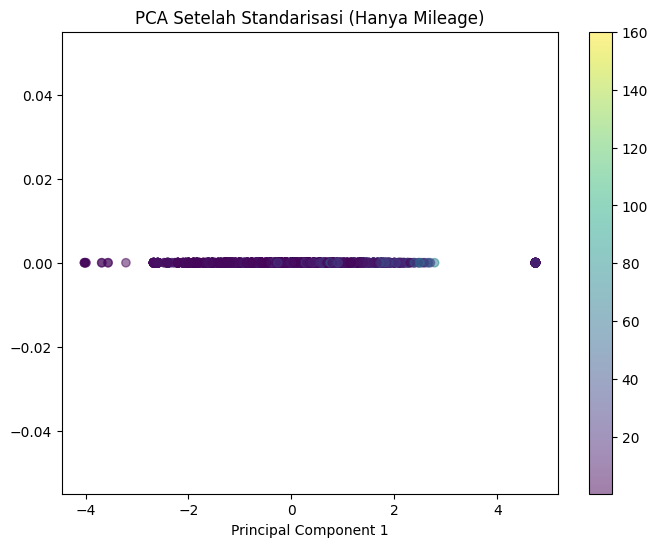

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Mengambil hanya kolom "Mileage"
X_mileage = X[['Mileage']]

# Standarisasi data
scaler = StandardScaler()
X_mileage_scaled = scaler.fit_transform(X_mileage)

# PCA setelah standarisasi data
pca_after = PCA(n_components=1)  # Mengubah jumlah komponen menjadi 1
X_mileage_pca = pca_after.fit_transform(X_mileage_scaled)

# Visualisasi hasil PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_mileage_pca[:, 0], [0]*len(X_mileage_pca), c=Y, cmap='viridis', alpha=0.5)  # Memplot hanya terhadap satu sumbu
plt.title('PCA Setelah Standarisasi (Hanya Mileage)')
plt.xlabel('Principal Component 1')
plt.ylabel('')  # Tidak ada label pada sumbu y
plt.colorbar()
plt.show()


Saya akan melakukan standarisasi pada dataset sebelum fitting PCA karena hal ini memastikan bahwa semua variabel memiliki skala yang serupa, menghindari bias dalam representasi hasil PCA, dan mengurangi masalah numerik yang mungkin terjadi selama perhitungan, sehingga memastikan hasil PCA lebih stabil, bebas dari bias skala, dan memberikan representasi yang lebih akurat dari struktur sebenarnya dari data.

### Visualisasi PCA

Hasil PCA menjadi dua dimensi

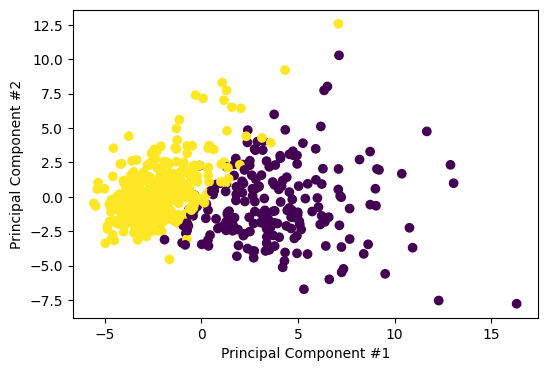

In [ ]:
plt.figure(figsize=(6, 4))

plt.scatter(transformed[:, 0], transformed[:, 1],
            c=cancer['target'],)

# labeling x and y axes
plt.xlabel('Principal Component #1')
plt.ylabel('Principal Component #2')
plt.show()

In [ ]:
print("Cumulative explained variance ratio for 2 dimension:",np.sum(pca.explained_variance_ratio_[:2]))

Cumulative explained variance ratio for 2 dimension: 0.6324320765155944


Melakukan PCA dengan semua dimensi untuk melihat variansi data yang ditangkap

In [ ]:
pca_all = PCA()
pca_all.fit(scaled_data)
transformed_all = pca_all.transform(scaled_data)

In [ ]:
print(np.cumsum(pca_all.explained_variance_ratio_[:10]))

[0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953  0.92598254 0.93987903 0.95156881]


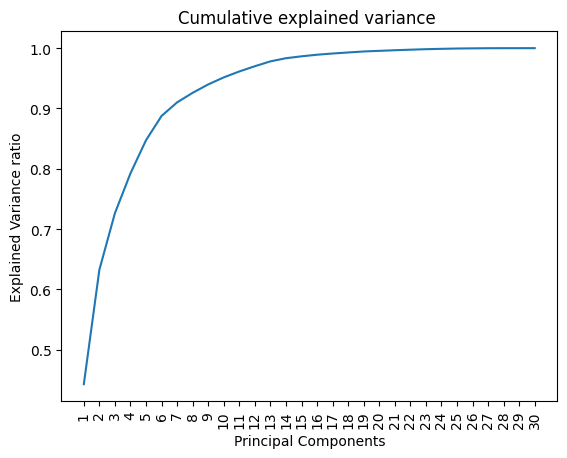

In [ ]:
plt.plot(range(1,31),    np.cumsum(pca_all.explained_variance_ratio_))
plt.ylabel('Explained Variance ratio')
plt.xlabel('Principal Components')
plt.xticks(range(1,31),
           [f"{i}" for i in range(1,31)], rotation=90)
plt.title('Cumulative explained variance ')
plt.show()

In [ ]:
print("Cumulative explained variance ratio for 2 dimension:",np.sum(pca.explained_variance_ratio_[:2]))

Cumulative explained variance ratio for 2 dimension: 0.6324320765155944


### Soal 6b
Berikan observsi dan interpretasi anda mengenai:
1. visualisasi hasil PCA dalam 2 dimensi di atas
2. visualisasi *cumulative explained variance* di atas

> jawaban disini
<br>
Masukan juga sumber jawaban anda disini dan di list referensi di atas jika menggunakan